# Keras - imports, data formatting, and 7 lines of code

In [1]:
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.regularizers import l2

from mnist_loader import load

Using TensorFlow backend.


In [2]:
# Hyper params and constants
IMAGE_SIZE = 28

INPUT_SIZE = IMAGE_SIZE * IMAGE_SIZE
HIDDEN_SIZE = 200
OUTPUT_SIZE = 10

LEARNING_RATE = 0.05
ALPHA = 0.0001
EPOCHS = 10
MINIBATCH_SIZE = 5

LOSS='categorical_crossentropy'

# File to save trained model to
SAVE_FILE = "C:/Users/Sanjay/Desktop/keras-mnist-model"

Retrieving standard mnist set
Loaded data set


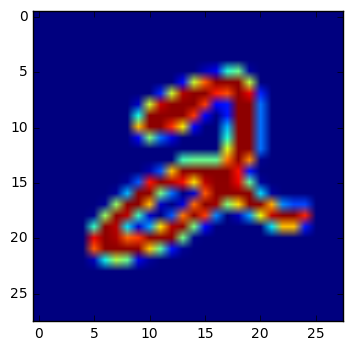

In [3]:
# Load data -- from net_tf.py

path = "Data\mnist.pkl.gz"
train_data, validation_data, test_data = load(path)

def vectorize(labels):
    for i, label in enumerate(labels):
        vector = np.zeros(10)
        vector[label] = 1
        labels[i] = vector
    return labels

# Tuples of (img, label) --> list of imgs, list of labels
train_imgs, train_vals = zip(*train_data)
train_labels = vectorize(list(train_vals))
train_imgs = np.vstack(train_imgs)
train_labels = np.vstack(train_labels)

# Tuples of (img, label) --> list of imgs, list of labels
vali_imgs, vali_vals = zip(*validation_data)
vali_labels = vectorize(list(vali_vals))
vali_imgs = np.vstack(vali_imgs)
vali_labels = np.vstack(vali_labels)

# Tuples of (img, label) --> matrix of imgs, list of labels
test_imgs, test_labels = zip(*test_data)
test_imgs = np.vstack(test_imgs)

# Change index of train_imgs to see other images
plt.imshow(np.reshape(train_imgs[5], (IMAGE_SIZE, IMAGE_SIZE)))

In [4]:
model = Sequential()

model.add(Dense(HIDDEN_SIZE, init='lecun_uniform', input_dim=784, W_regularizer=l2(ALPHA)))
model.add(Activation('relu'))
model.add(Dense(OUTPUT_SIZE, init='lecun_uniform', W_regularizer=l2(ALPHA)))
model.add(Activation('sigmoid'))

In [5]:
# optimizer= takes either string or optimizer object
model.compile(loss=LOSS, optimizer=SGD(lr=LEARNING_RATE), metrics=['accuracy'])

In [6]:
# verbose: 0 for no logging to stdout, 1 for progress bar logging, 2 for one log line per epoch.
hist = model.fit(train_imgs, train_labels, nb_epoch=EPOCHS, batch_size=MINIBATCH_SIZE, 
          validation_data=(vali_imgs, vali_labels), shuffle=True, verbose=2)
print("Done training")

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
44s - loss: 0.3673 - acc: 0.9018 - val_loss: 0.2365 - val_acc: 0.9413
Epoch 2/10
45s - loss: 0.1969 - acc: 0.9566 - val_loss: 0.1946 - val_acc: 0.9613
Epoch 3/10
44s - loss: 0.1597 - acc: 0.9676 - val_loss: 0.1719 - val_acc: 0.9670
Epoch 4/10
44s - loss: 0.1440 - acc: 0.9735 - val_loss: 0.1514 - val_acc: 0.9733
Epoch 5/10
45s - loss: 0.1326 - acc: 0.9767 - val_loss: 0.1664 - val_acc: 0.9711
Epoch 6/10
43s - loss: 0.1244 - acc: 0.9801 - val_loss: 0.1599 - val_acc: 0.9721
Epoch 7/10
44s - loss: 0.1158 - acc: 0.9832 - val_loss: 0.1566 - val_acc: 0.9725
Epoch 8/10
46s - loss: 0.1103 - acc: 0.9846 - val_loss: 0.1617 - val_acc: 0.9702
Epoch 9/10
46s - loss: 0.1057 - acc: 0.9858 - val_loss: 0.1410 - val_acc: 0.9773
Epoch 10/10
46s - loss: 0.1029 - acc: 0.9867 - val_loss: 0.1376 - val_acc: 0.9784
Done training


{'val_acc': [0.94130000343918796, 0.9613000022694469, 0.96700000195205216, 0.97330000159144403, 0.97110000167787081, 0.97210000166296961, 0.97250000162422656, 0.97020000177621846, 0.97730000135302542, 0.9784000012874603], 'val_loss': [0.23648077969998121, 0.1945542014054954, 0.17188695445284247, 0.15144087751023472, 0.16635691114328802, 0.15987953777611255, 0.15659823581576349, 0.16167459350451827, 0.14100157004594802, 0.13764606791734696], 'acc': [0.90184000519961116, 0.95658000255078079, 0.96762000192105768, 0.97348000156581405, 0.9767200013846159, 0.98008000118732452, 0.9832400009989738, 0.98456000092029572, 0.98582000084519383, 0.98674000079035762], 'loss': [0.36727825704440475, 0.19693132417798043, 0.15966131328046321, 0.14400943412221967, 0.13263720941133797, 0.12444378893896937, 0.11583743164539337, 0.1102956792768091, 0.10572647321149707, 0.10292710163183511]}


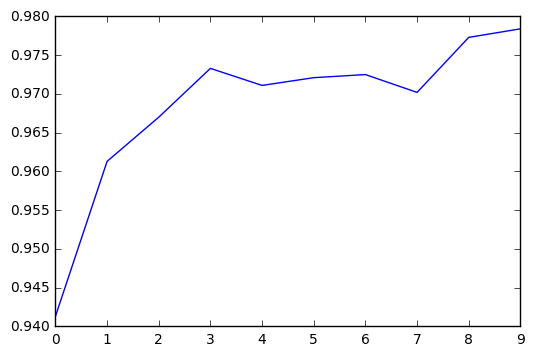

In [7]:
print(hist.history)
validation_loss = list(hist.history.values())[0]
plt.plot(range(EPOCHS), validation_loss)